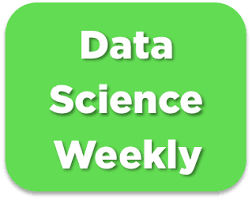

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

In [66]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt , seaborn as sns , missingno as msno
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display

In [67]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


--- EDA ---

In [68]:
data.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [70]:
print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [71]:
# Is the target variable balanced ?
print('Percentage of converted persons in the dataset : ' , round(len(data[data['converted'] == 1]) / len(data) , 3) * 100 , '%')

Percentage of converted persons in the dataset :  3.2 %


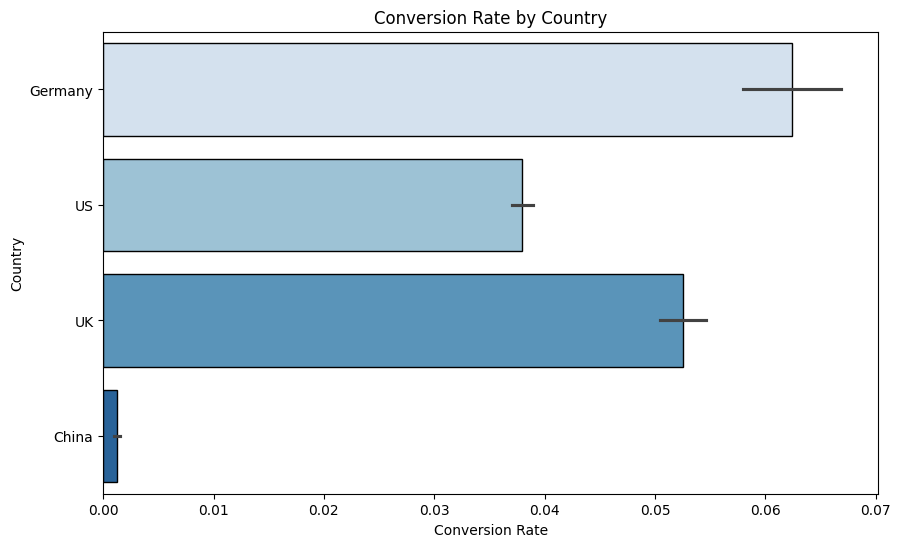

In [72]:
data = data.sort_values('converted')

# Create the color palette
palette = sns.color_palette("Blues", len(data['country'].unique()))

# Create the barplot with horizontal bars
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="converted", y="country", data=data, hue="country", palette=palette, edgecolor='black', dodge=False, legend=False)

# Add tags and title
barplot.set_xlabel("Conversion Rate")
barplot.set_ylabel("Country")
barplot.set_title("Conversion Rate by Country")

# Show chart
plt.show()

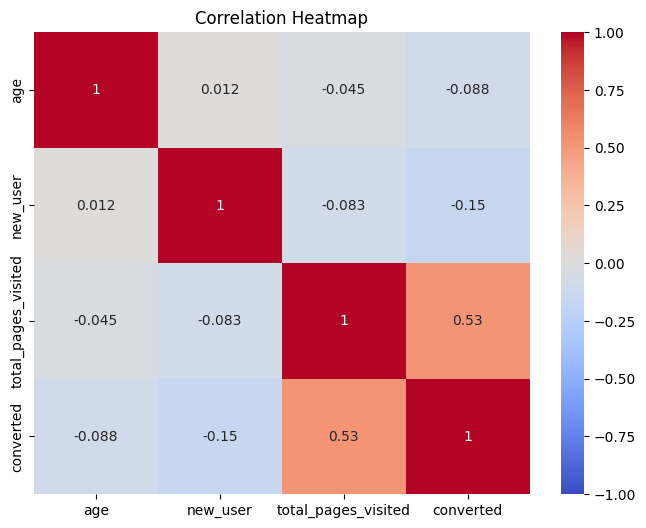

In [73]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numeric_data.corr()

# Create the heatmap with a color palette
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap')

# Show chart
plt.show()

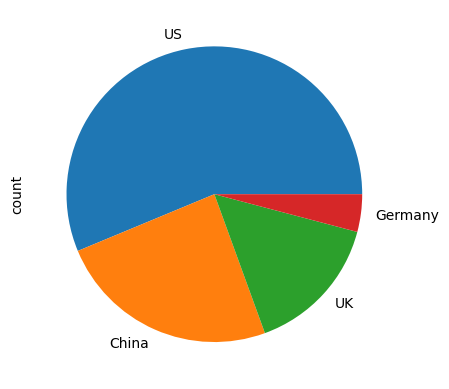

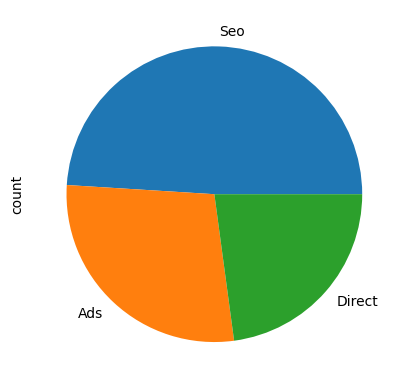

In [74]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

In [75]:
positive = data[data['converted'] == 1]
negative = data[data['converted'] == 0]

In [76]:
data.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [77]:
num_columns = ['age', 'total_pages_visited']
cat_columns = ['country', 'source', 'new_user']

/tmp/ipykernel_24802/3002138854.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive[col], label='converted', color=palette[7])  # Utilisation de la teinte la plus foncée disponible
/tmp/ipykernel_24802/3002138854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative[col], label='

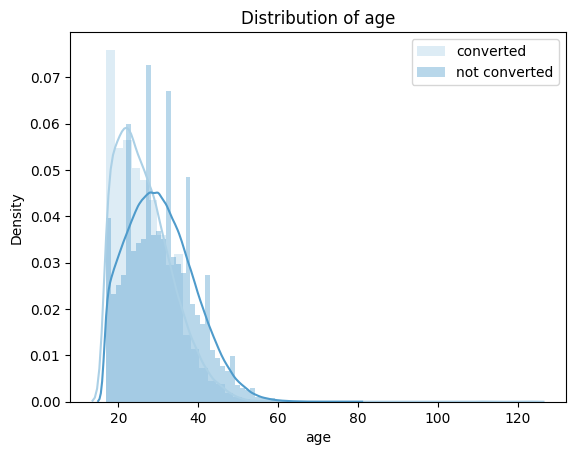

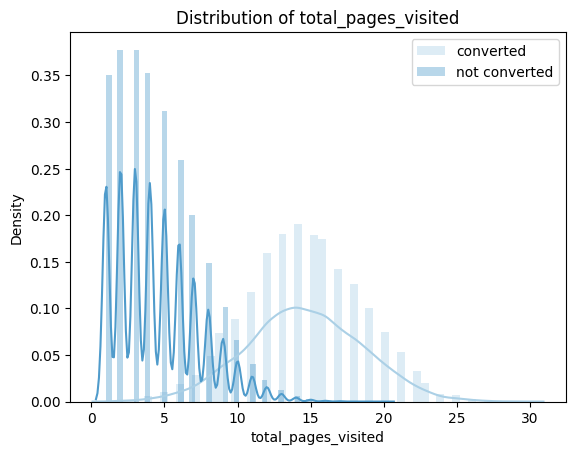

In [78]:
palette = sns.color_palette("Blues_r", 11)

for col in num_columns:
    plt.figure()
    sns.distplot(positive[col], label='converted', color=palette[7])  # Utilisation de la teinte la plus foncée disponible
    sns.distplot(negative[col], label='not converted', color=palette[4])  # Utilisation d'une teinte plus claire
    plt.legend()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.show()

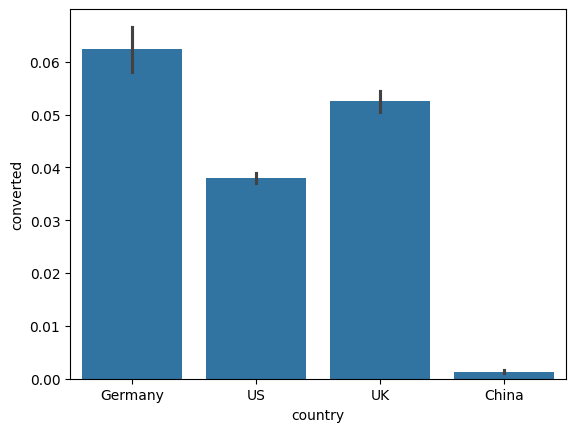

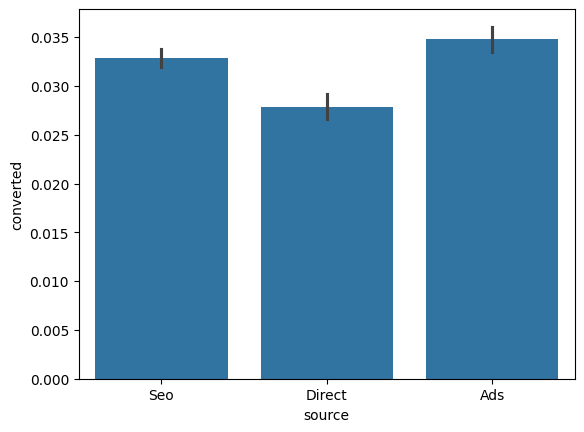

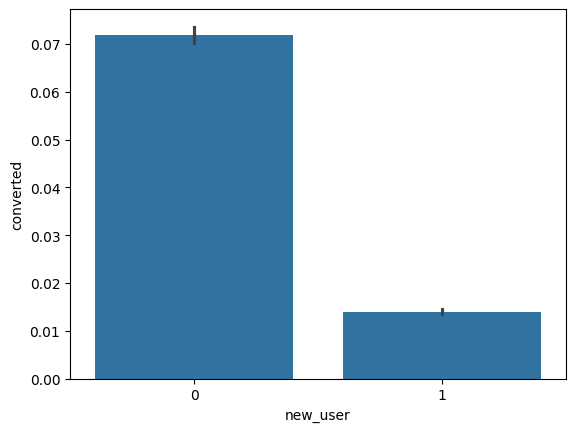

In [79]:
for col in cat_columns:
    plt.figure()
    sns.barplot(data=data, x=col, y='converted')

--- Preprocessing ---

In [80]:
# baseline accuracy : 
1-sum(data['converted'])/len(data['converted'])

0.967741935483871

In [81]:
features_list = ['total_pages_visited']
target_variable = 'converted'

In [82]:
df = pd.DataFrame(data)
X = df.loc[:, features_list]
Y = df.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [83]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [84]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[ 4]
 [ 7]
 [ 6]
 [14]
 [ 6]]
[[3]
 [6]]

[0 0 0 1 0]
[0 0]


--- Train|Test ---

In [85]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.26081072]
 [ 0.63774678]
 [ 0.33822761]
 [ 2.73438096]
 [ 0.33822761]]


In [86]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [87]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [88]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.56032989]
 [ 0.33822761]
 [-0.56032989]
 [-0.56032989]
 [-0.26081072]]


In [89]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [90]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6944347217360868
f1-score on test set :  0.7011706715958103


In [91]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246797   1063]
 [  3302   4960]]

Confusion matrix on test set : 
[[27404   136]
 [  349   569]]



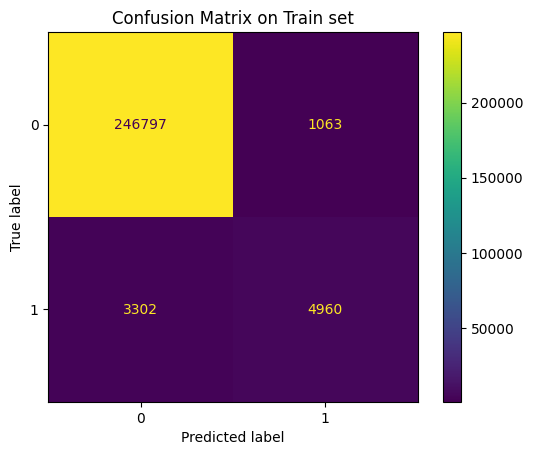

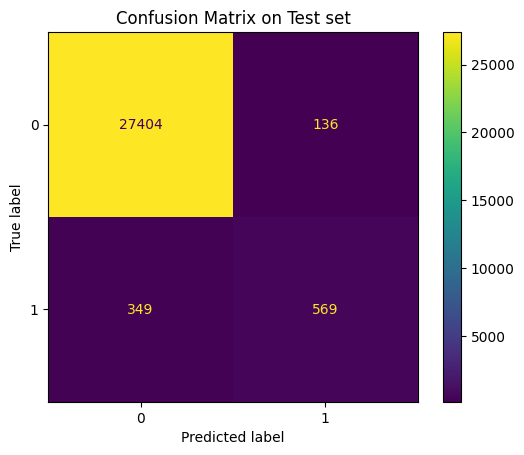

In [92]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

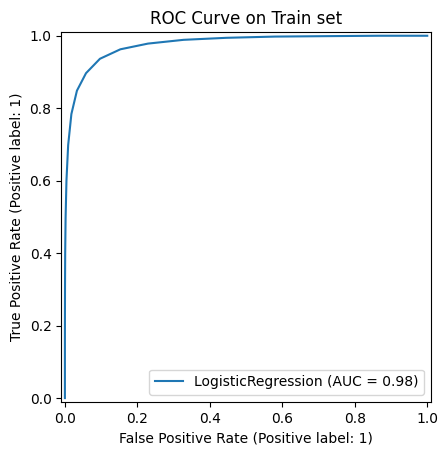

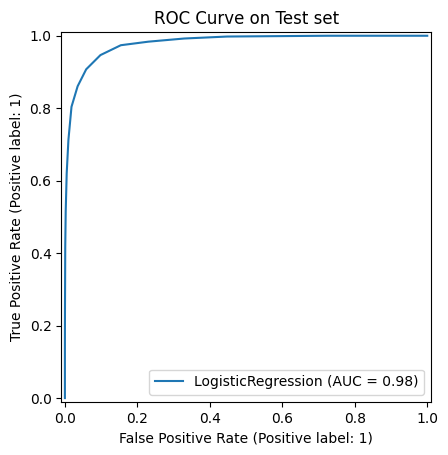

In [93]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

--- Train best classifier on all data and use it to make predictions on X_without_labels ---

In [94]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [96]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16]
 [ 5]
 [ 1]
 [ 6]
 [ 3]]


In [97]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 3.3334193 ]
 [ 0.03870845]
 [-1.15936823]
 [ 0.33822761]
 [-0.56032989]]


In [99]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
prediction_data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=prediction_data)
Y_predictions.to_csv('rafik-modele1.csv', index=False)

## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**

In [100]:
# let's train a multivariate model by adding more variables to the feature list

features_list =['total_pages_visited', 'age', 'country', 'source', 'new_user']

numerical_features = ['total_pages_visited', 'age']
categorical_features = ['country', 'source', 'new_user']

target_variable = 'converted'

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited', 'age', 'country', 'source', 'new_user'], dtype='object')



In [101]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [102]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [103]:
print("Preprocessing X_train...")
print()
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print()

print("Preprocessing X_test...")

X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test[0:5,:]) # X_test is now a numpy array

Preprocessing X_train...

...Done!
[[-1.15950298 -0.67343346  0.          0.          1.          0.
   1.          1.        ]
 [-0.56036299  1.14130663  0.          1.          0.          0.
   1.          0.        ]
 [ 0.338347   -0.0685201   0.          0.          0.          0.
   0.          1.        ]
 [-0.85993298  1.2622893   0.          0.          1.          1.
   0.          1.        ]
 [ 0.93748699  1.38327197  0.          0.          1.          0.
   0.          1.        ]]

Preprocessing X_test...
...Done
[[-0.26079299 -0.55245079  0.          0.          0.          0.
   0.          1.        ]
 [-0.56036299 -0.43146812  0.          1.          0.          0.
   1.          1.        ]
 [-0.56036299 -0.43146812  0.          1.          0.          0.
   1.          0.        ]
 [-0.85993298 -0.43146812  0.          0.          1.          1.
   0.          1.        ]
 [-0.56036299  1.02032395  0.          1.          0.          0.
   0.          1.        ]]


In [104]:
print("Convert pandas DataFrames to numpy arrays...")
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[0 0 0 0 0]
[0 0]


In [105]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [106]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [107]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [108]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7631561305892606
f1-score on test set :  0.7725373134328358


In [109]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246897    963]
 [  2570   5692]]

Confusion matrix on test set : 
[[27430   110]
 [  271   647]]



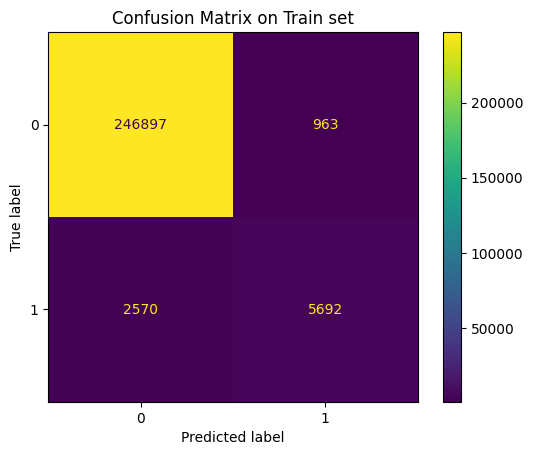

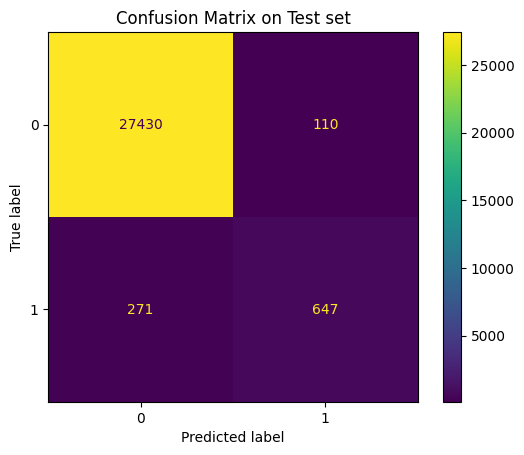

In [110]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

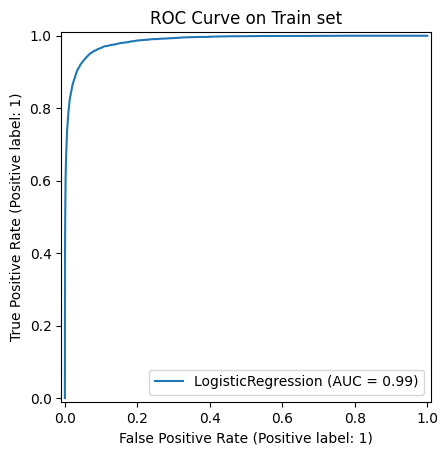

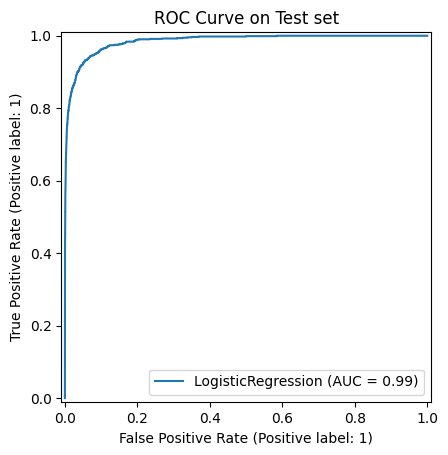

In [111]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

------------------------------------------

In [113]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited', 'age', 'country', 'source', 'new_user']
X_without_labels = data_without_labels.loc[:, features_list]

# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
prediction_data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=prediction_data)
Y_predictions.to_csv('rafik-model2.csv', index=False)

Prediction set (without labels) : (31620, 5)
Encoding categorical features and standardizing numerical features...
...Done
[[ 3.33404697 -0.31048544  0.          1.          0.          0.
   1.          0.        ]
 [ 0.03877701 -1.03638148  0.          1.          0.          1.
   0.          1.        ]
 [-1.15950298  0.17344525  0.          0.          0.          0.
   1.          1.        ]
 [ 0.338347    0.17344525  0.          0.          1.          0.
   0.          1.        ]
 [-0.56036299 -0.67343346  0.          0.          0.          0.
   1.          0.        ]]


In [114]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['total_pages_visited', 'age', 'country_Germany', 'country_UK', 'country_US', 'source_Direct', 'source_Seo', 'new_user_1']


In [115]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = classifier.coef_.transpose(), columns=["coefficients"])
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients', ascending = False)
feature_importance

,coefficients
country_Germany,3.560035
country_UK,3.329560
country_US,2.989621
total_pages_visited,2.522977
new_user_1,1.705193
age,0.602445
source_Direct,0.205388
source_Seo,0.017713


Text(0.5, 0, 'Logistic regression feature importance')

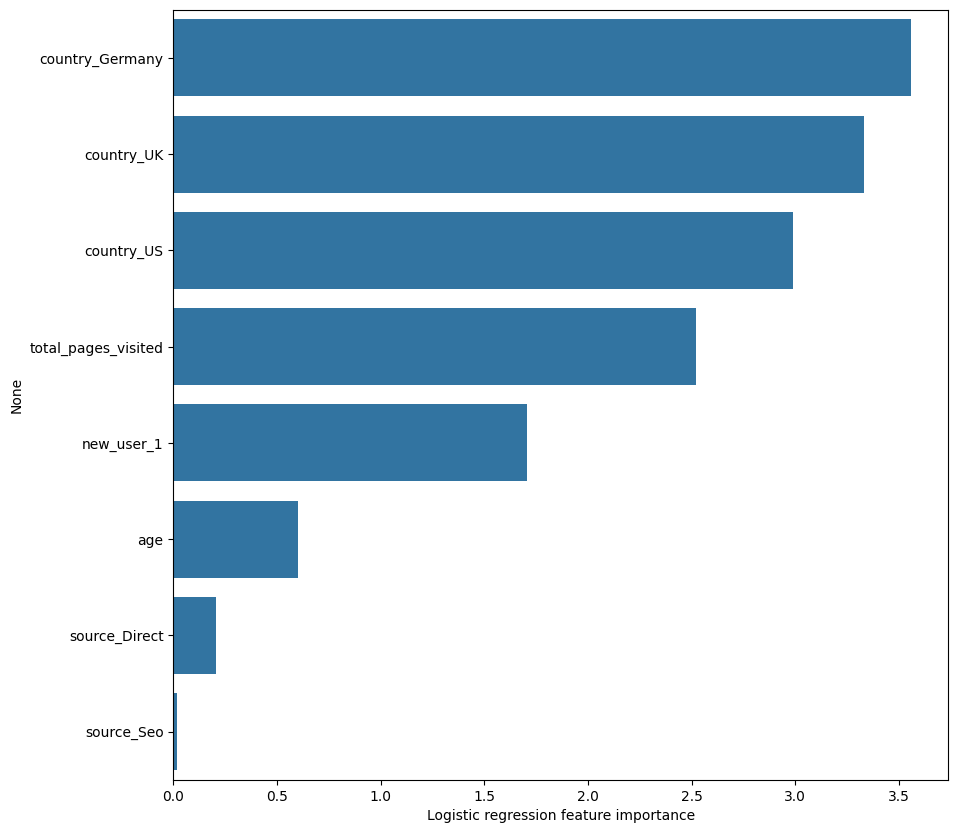

In [116]:
plt.figure(figsize=(10, 10))
sns.barplot(y = feature_importance.index, x = feature_importance['coefficients'])
plt.xlabel("Logistic regression feature importance")

In [117]:
# remove total_pages_visited from the feature's list

features_list = ['age', 'country', 'source', 'new_user']

numerical_features = ['age']
categorical_features = ['country', 'source', 'new_user']

target_variable = 'converted'

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['age', 'country', 'source', 'new_user'], dtype='object')



In [118]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [119]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [120]:
print("Preprocessing X_train...")
print()
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print()

print("Preprocessing X_test...")

X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test[0:5,:]) # X_test is now a numpy array

Preprocessing X_train...

...Done!
[[-0.67343346  0.          0.          1.          0.          1.
   1.        ]
 [ 1.14130663  0.          1.          0.          0.          1.
   0.        ]
 [-0.0685201   0.          0.          0.          0.          0.
   1.        ]
 [ 1.2622893   0.          0.          1.          1.          0.
   1.        ]
 [ 1.38327197  0.          0.          1.          0.          0.
   1.        ]]

Preprocessing X_test...
...Done
[[-0.55245079  0.          0.          0.          0.          0.
   1.        ]
 [-0.43146812  0.          1.          0.          0.          1.
   1.        ]
 [-0.43146812  0.          1.          0.          0.          1.
   0.        ]
 [-0.43146812  0.          0.          1.          1.          0.
   1.        ]
 [ 1.02032395  0.          1.          0.          0.          0.
   1.        ]]


In [121]:
print("Convert pandas DataFrames to numpy arrays...")
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[0 0 0 0 0]
[0 0]


In [122]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [123]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [124]:
# Predictions on training set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



f1-score on train set :  0.0
f1-score on test set :  0.0



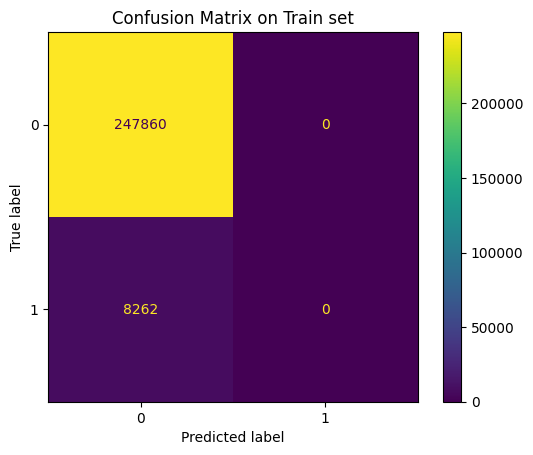

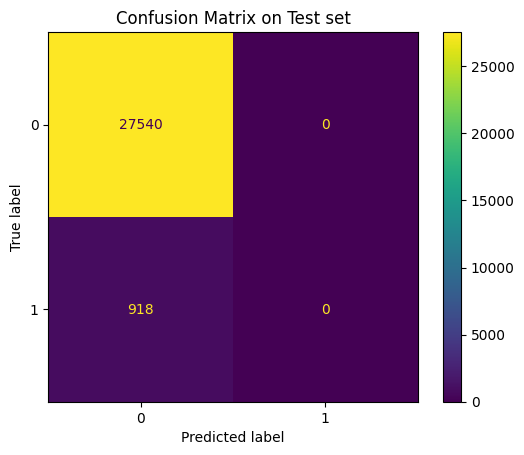

In [125]:
#f1-score
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

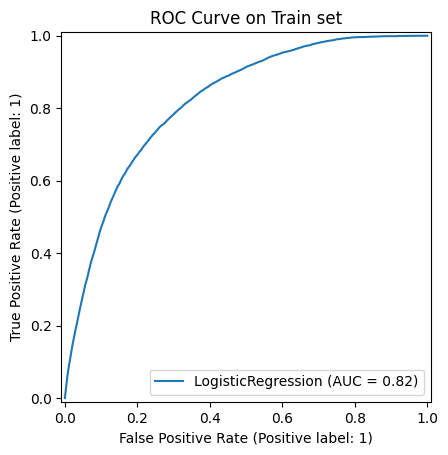

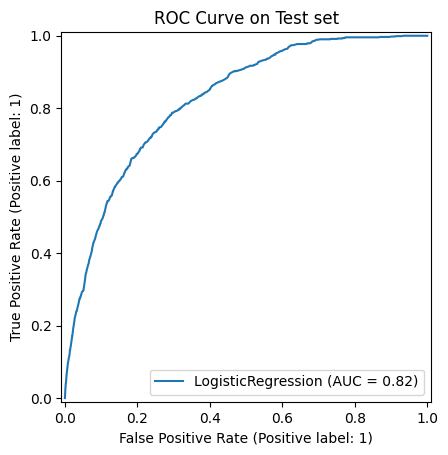

In [126]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

-------------------------------------------------------------------------------------

In [127]:
classifier = LogisticRegression(class_weight="balanced") # takes into account the different classes' proportions
classifier.fit(X_train, Y_train)
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

Predictions on training set...
...Done.
[0 1 0 ... 1 1 0]

Predictions on test set...
...Done.
[0 0 1 ... 0 0 0]

f1-score on train set :  0.15580053288883838
f1-score on test set :  0.15618961009435034


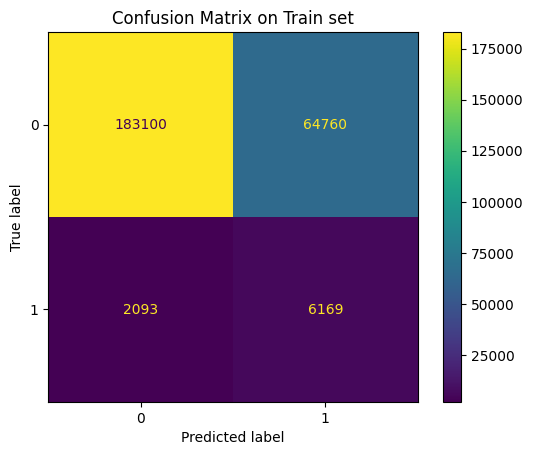

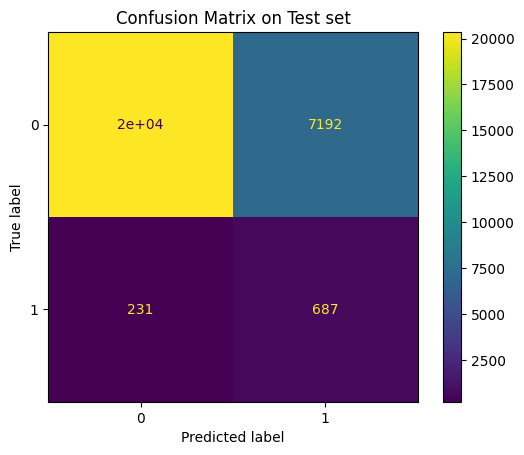

In [128]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

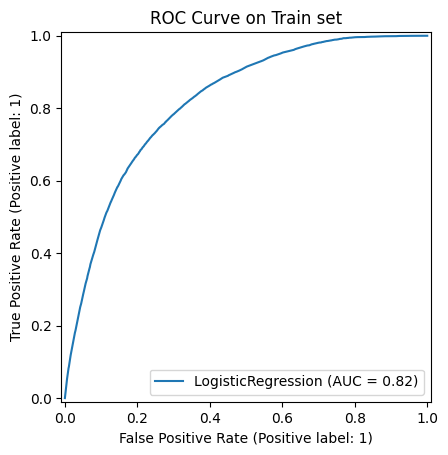

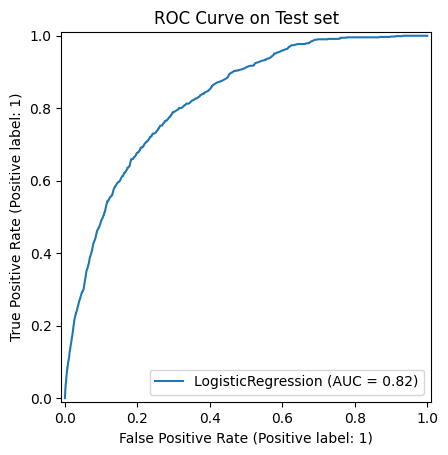

In [129]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

--- try to improve the model by Searching the best hyperparameters ---

In [130]:
# reprocessing

features_list =['total_pages_visited', 'age', 'country', 'source', 'new_user']

numerical_features = ['total_pages_visited', 'age']
categorical_features = ['country', 'source', 'new_user']

target_variable = 'converted'

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=0)
print("...Done.")
print()
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
print("Preprocessing X_train...")
print()
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print()

print("Preprocessing X_test...")

X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test[0:5,:]) # X_test is now a numpy array

print("Convert pandas DataFrames to numpy arrays...")
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")
print(Y_train[0:5])
print(Y_test[0:2])

Explanatory variables :  Index(['total_pages_visited', 'age', 'country', 'source', 'new_user'], dtype='object')

Dividing into train and test sets...
...Done.

Preprocessing X_train...

...Done!
[[-1.15950298 -0.67343346  0.          0.          1.          0.
   1.          1.        ]
 [-0.56036299  1.14130663  0.          1.          0.          0.
   1.          0.        ]
 [ 0.338347   -0.0685201   0.          0.          0.          0.
   0.          1.        ]
 [-0.85993298  1.2622893   0.          0.          1.          1.
   0.          1.        ]
 [ 0.93748699  1.38327197  0.          0.          1.          0.
   0.          1.        ]]

Preprocessing X_test...
...Done
[[-0.26079299 -0.55245079  0.          0.          0.          0.
   0.          1.        ]
 [-0.56036299 -0.43146812  0.          1.          0.          0.
   1.          1.        ]
 [-0.56036299 -0.43146812  0.          1.          0.          0.
   1.          0.        ]
 [-0.85993298 -0.43146812  

In [131]:
# grid search logistic regression model
# define model
model = LogisticRegression()
# define evaluation
cv = 5
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='f1', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, Y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/home/rafik/anaconda3/envs/certif/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rafik/anaconda3/envs/certif/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rafik/anaconda3/envs/certif/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/rafik/anaconda3/envs/certif/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    v

Best Score: 0.763584507541979
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [132]:
classifier = LogisticRegression(solver='liblinear', penalty='l2', C=10) # takes into account the different classes' proportions
classifier.fit(X_train, Y_train)
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

f1-score on train set :  0.7638749414206333
f1-score on test set :  0.7714285714285715


### Linear SVM

In [134]:
print('Training linear SVM...')
svc = SVC(kernel = 'linear', C=10, gamma=100)
svc.fit(X_train, Y_train)
print("...Done.")

Training linear SVM...
...Done.


In [135]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on training set :  0.7638749414206333
f1-score on test set :  0.7714285714285715


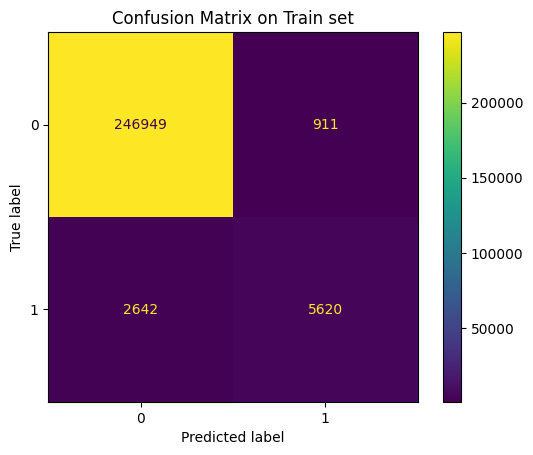

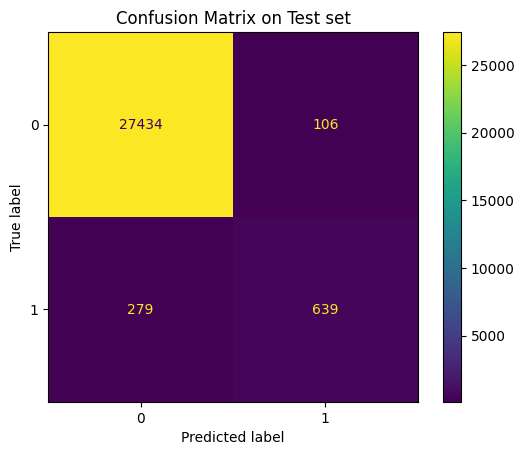

In [136]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

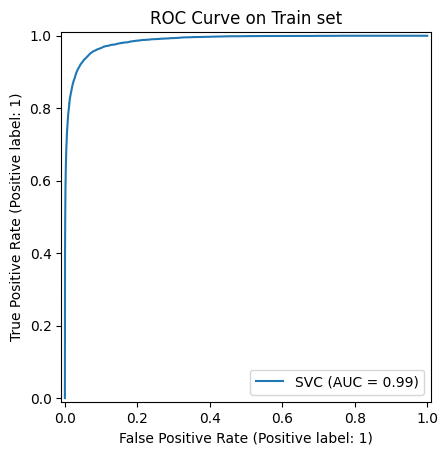

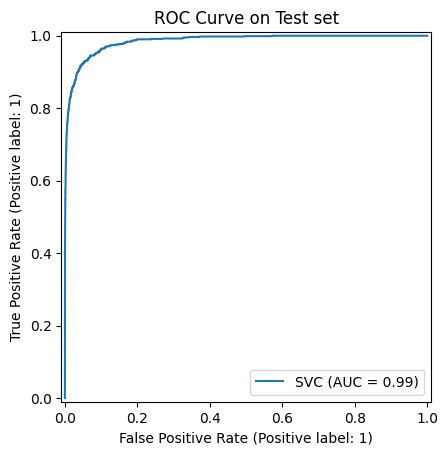

In [137]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(svc, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(svc, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

In [138]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = svc.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = svc.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



### Random Forest

In [139]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [140]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = forest.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = forest.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [141]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on training set :  0.8030574941841143
f1-score on test set :  0.7382075471698113


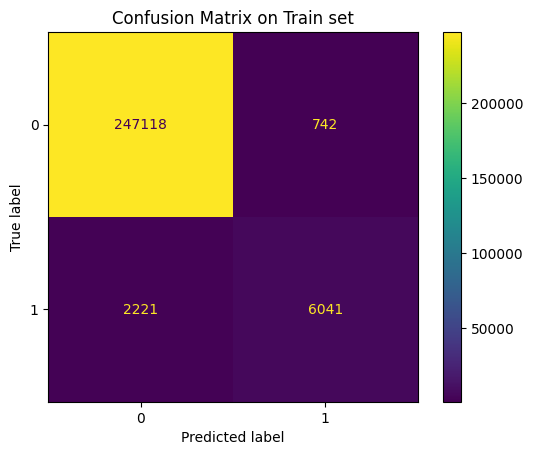

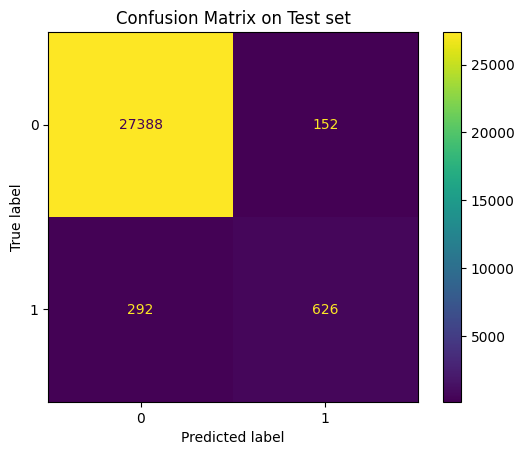

In [143]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(forest, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(forest, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

Text(0.5, 0, 'Random forest feature importance')

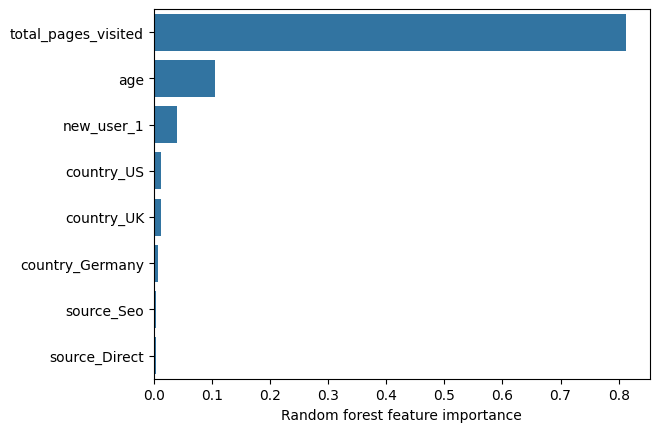

In [144]:
# plot feature importance
# The importance score is a measure of how often the feature was selected for splitting
# and how much gain in purity was achieved as a result of the selection
sorted_idx = forest.feature_importances_.argsort()[::-1]
sns.barplot(y = np.array(column_names)[sorted_idx], x = forest.feature_importances_[sorted_idx])
plt.xlabel("Random forest feature importance")

--- Grid search CV for random forest ---

In [145]:
###### Training with hyperparameters optimization #######

# ⚠ code execution time ~ 30min

# Perform grid search
print("Grid search...")
forest_model = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [10, 25, 100],
    'min_samples_leaf': [1, 2, 10],
    'min_samples_split': [4, 8, 12],
    'n_estimators': [50, 100, 300]
}

gridsearch = GridSearchCV(forest_model, scoring='f1', param_grid = params, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best f1-score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 100}
Best f1-score :  0.7606569732130346


In [147]:
forest = RandomForestClassifier(max_depth= 10, min_samples_leaf= 10, min_samples_split= 4, n_estimators= 100, random_state=42)
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=4,
                       random_state=42)

In [148]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = forest.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = forest.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



metrics training set
f1-score:  0.7707984179124489
precision:  0.8638617580766341
recall:  0.695836359235052
acuracy:  0.9866508929338362
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    247860
           1       0.86      0.70      0.77      8262

    accuracy                           0.99    256122
   macro avg       0.93      0.85      0.88    256122
weighted avg       0.99      0.99      0.99    256122

None
metrics test set
f1-score:  0.7606478704259149
precision:  0.8464619492656876
recall:  0.690631808278867
acuracy:  0.9859793379717479
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27540
           1       0.85      0.69      0.76       918

    accuracy                           0.99     28458
   macro avg       0.92      0.84      0.88     28458
weighted avg       0.99      0.99      0.99     28458

None


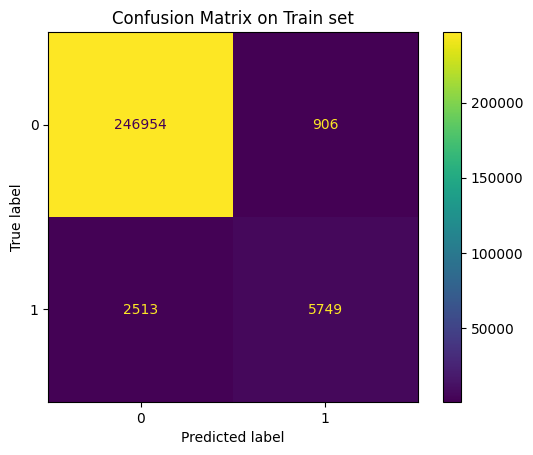

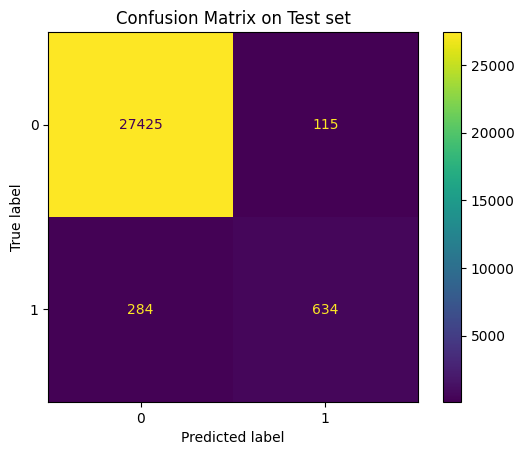

In [149]:
# display metrics
def display_metrics(true, pred):
    print("f1-score: ", metrics.f1_score(true, pred))
    print("precision: ", metrics.precision_score(true, pred))
    print("recall: ", metrics.recall_score(true, pred))
    print("acuracy: ", metrics.accuracy_score(true, pred))
    print(metrics.classification_report(true, pred))


print("metrics training set")
print(display_metrics(Y_train, Y_train_pred))
print("metrics test set")
print(display_metrics(Y_test, Y_test_pred))

# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(forest, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(forest, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

Text(0.5, 0, 'Random forest feature importance')

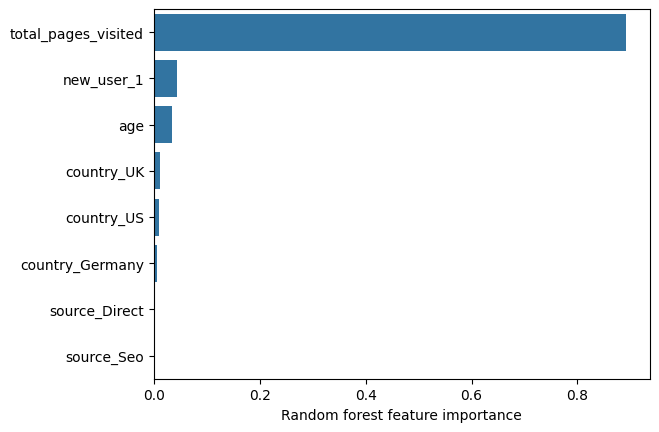

In [150]:
# plot feature importance
# The importance score is a measure of how often the feature was selected for splitting
# and how much gain in purity was achieved as a result of the selection
sorted_idx = forest.feature_importances_.argsort()[::-1]
sns.barplot(y = np.array(column_names)[sorted_idx], x = forest.feature_importances_[sorted_idx])
plt.xlabel("Random forest feature importance")

--- My recommandations ---

1 - Enhancing User Engagement : The primary driver of conversion is the number of pages visited. Since visitors exploring more pages already show interest in the newsletter, improving the website's user interface could encourage deeper engagement.

2 - Targeting Younger Audiences : A significant proportion of newsletter subscribers are under 35 years old. Customizing advertisements and content to resonate with this demographic will likely maximize conversion rates.

3 - Encouraging Repeat Visits : The second most impactful factor is whether it's the user's first visit. To boost conversion, the website should focus on re-engaging returning users and enhancing their experience.

4 - Tailoring to Chinese Users : Users from China exhibit lower conversion rates despite high traffic. Investigating potential interface issues and addressing translation challenges could significantly improve appeal and engagement among this demographic.

